## Vacant Land Data: Community Boundaries 

Communities are one of the most complex geographic issues in the County of Los Angeles, due to historical narratives, perceptions of value, intense public interest, and shifts over time. The County has a need to establish a consistent geographic reporting base that will enable statistics and information to reported to the Board, that attempts to represent all of the interactions but is primarily focused on reporting.

In [1]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
boundaries = gpd.read_file("Community Boundaries (CSA) (1).geojson")

In [3]:
type (boundaries)

geopandas.geodataframe.GeoDataFrame

In [4]:
boundaries.info

<bound method DataFrame.info of                    community   source  \
0                       None      BOS   
1                       None      BOS   
2            Harvard Heights  LA City   
3    Westfield/Academy Hills      BOS   
4              Beverly Crest  LA City   
..                       ...      ...   
343                     None      BOS   
344              Willowbrook      BOS   
345             Shadow Hills  LA City   
346               West Hills  LA City   
347                     None      BOS   

                                        label       city_type objectid  \
0                        City of Agoura Hills            City        1   
1                         City of Temple City            City      214   
2               Los Angeles - Harvard Heights            City       95   
3    Unincorporated - Westfield/Academy Hills  Unincorporated      334   
4                 Los Angeles - Beverly Crest            City       55   
..                             

In [5]:
boundaries.head()

,community,source,label,city_type,objectid,lcity,shape_stlength,shape_starea,geometry
0,None,BOS,City of Agoura Hills,City,1,Agoura Hills,80374.083443170195,217940117.12695313,"MULTIPOLYGON (((-118.72864 34.16793, -118.7286..."
1,None,BOS,City of Temple City,City,214,Temple City,60506.140608433387,112232462.72851563,"MULTIPOLYGON (((-118.05659 34.11841, -118.0563..."
2,Harvard Heights,LA City,Los Angeles - Harvard Heights,City,95,Los Angeles,21077.385705038188,20898421.74609375,"MULTIPOLYGON (((-118.29156 34.04000, -118.2923..."
3,Westfield/Academy Hills,BOS,Unincorporated - Westfield/Academy Hills,Unincorporated,334,Unincorporated,17831.004587317788,14591857.321289063,"MULTIPOLYGON (((-118.34845 33.77939, -118.3488..."
4,Beverly Crest,LA City,Los Angeles - Beverly Crest,City,55,Los Angeles,110820.54850926602,234233281.15039063,"MULTIPOLYGON (((-118.40751 34.12945, -118.4074..."


I was able to get the basic information of my data set to make sure it imported correctly.

In [6]:
boundaries.dtypes

community           object
source              object
label               object
city_type           object
objectid            object
lcity               object
shape_stlength      object
shape_starea        object
geometry          geometry
dtype: object

In [7]:
list(boundaries)

['community',
 'source',
 'label',
 'city_type',
 'objectid',
 'lcity',
 'shape_stlength',
 'shape_starea',
 'geometry']

<AxesSubplot:>

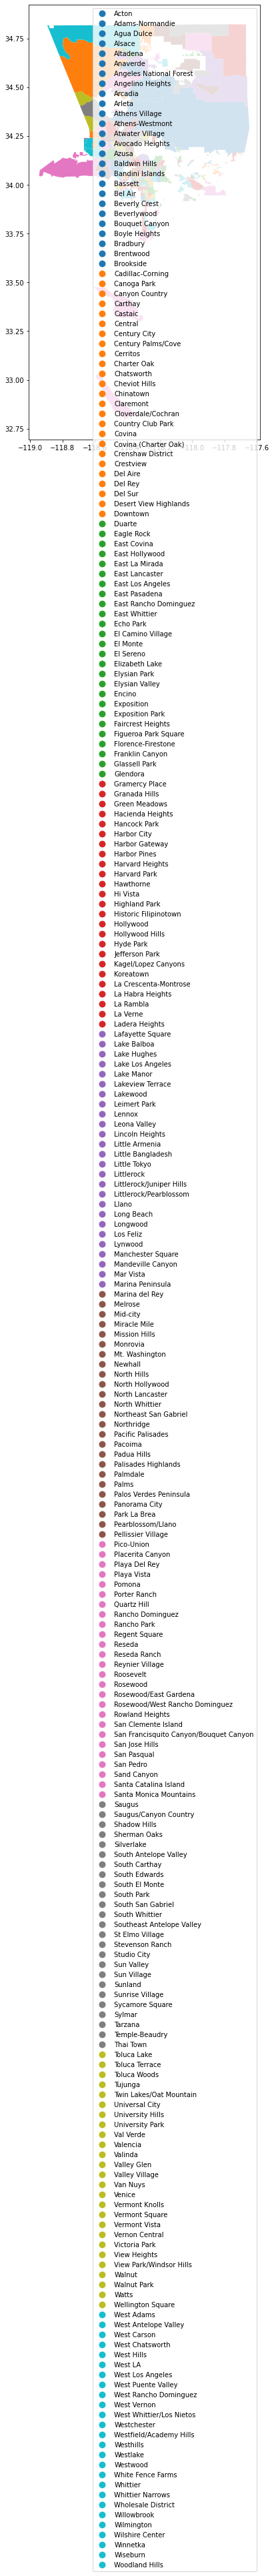

In [8]:
boundaries.plot(figsize=(12,12),
                          column='community',
                          legend=True)

### Creating New Data Frame

I plotted it to see the entire data set, Now i want to narrow down to El Sereno and Lincoln Heights.

In [11]:
boundaries[boundaries.community == 'El Sereno']

,community,source,label,city_type,objectid,lcity,shape_stlength,shape_starea,geometry
116,El Sereno,LA City,Los Angeles - El Sereno,City,78,Los Angeles,57287.733092284157,109050969.50683594,"MULTIPOLYGON (((-118.15536 34.09867, -118.1553..."


In [12]:
boundaries[boundaries.community == 'Lincoln Heights']

,community,source,label,city_type,objectid,lcity,shape_stlength,shape_starea,geometry
152,Lincoln Heights,LA City,Los Angeles - Lincoln Heights,City,108,Los Angeles,60756.009942239587,91056715.407226563,"MULTIPOLYGON (((-118.19006 34.09722, -118.1903..."


Now, I will create a new datafame with only those two community boundaries.

In [13]:
boundaries_new = boundaries.loc[[116,152]]

In [14]:
boundaries_new

,community,source,label,city_type,objectid,lcity,shape_stlength,shape_starea,geometry
116,El Sereno,LA City,Los Angeles - El Sereno,City,78,Los Angeles,57287.733092284157,109050969.50683594,"MULTIPOLYGON (((-118.15536 34.09867, -118.1553..."
152,Lincoln Heights,LA City,Los Angeles - Lincoln Heights,City,108,Los Angeles,60756.009942239587,91056715.407226563,"MULTIPOLYGON (((-118.19006 34.09722, -118.1903..."


<AxesSubplot:>

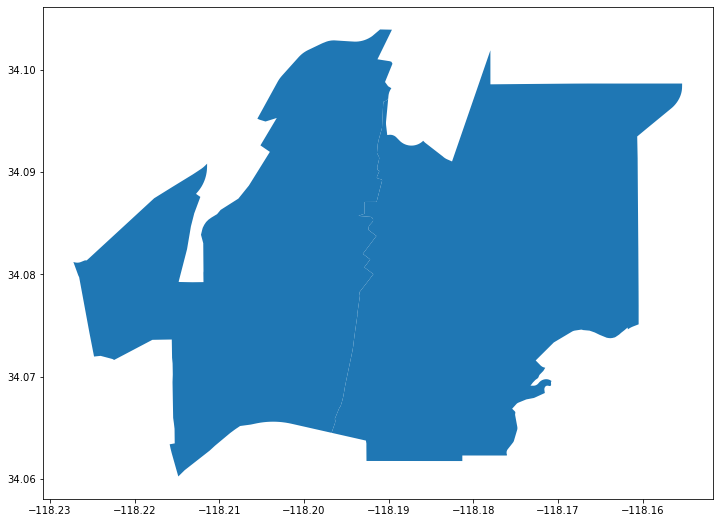

In [16]:
boundaries_new.plot(figsize=(12,12))

### Adding Basemap

In [36]:
boundaries_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
boundaries_new_wm = boundaries_new.to_crs(epsg=3857)

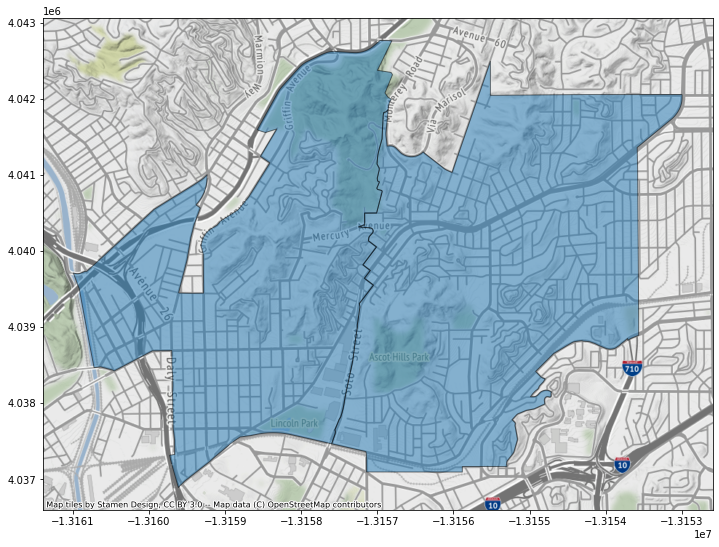

In [44]:
ax = boundaries_new_wm.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
arrest_by_neighborhood = gpd.sjoin(neighborhoods, gdf) #Spatial join Points to polygons
arrest_by_neighborhood

In [ ]:
# count the number of records per community
arrest_counts = arrest_by_neighborhood.value_counts('community').reset_index(name='arrest_count')
arrest_counts

In [ ]:
# add the count to the neighborhoods
neighborhoods = neighborhoods.merge(arrest_counts, how='left', on='community')

In [ ]:
neighborhoods.sample(10)

In [ ]:
# choropleth map of arrests by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

neighborhoods.plot(ax=ax,column='arrest_count',legend=True,cmap='Reds')


<div class="alert alert-info">
Now it's your turn!

* Make the final map output "prettier"
* Find a socrata based open dataset
* Use the sodapy library and import it
* Conduct data exploration and analysis
* Create two or more plots using the plotly express library
* Create map visualization using plotly and/or the KeplerGL libraries
</div>

Post your results in our class gallery <a href="https://docs.google.com/document/d/1u1b4r6j9Av-u3LZnzE5CL_fblss7EWnEXoSBKQ_Ao9Y/edit#" target="_blank">Google Document</a>.

## EXPLORING LA DEMOGRAPHICS
3 census tracts 

In [ ]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [ ]:
race = gpd.read_file('acs2019_5yr_B03002_14000US06037222001.geojson')

In [ ]:
race.shape

In [ ]:
# first five rows, but not all columns?
race.head()

In [ ]:
# look at the data types
race.info()

In [ ]:
race.geoid.head()

In [ ]:
list(race) # this is the same as df.columns.to_list()

In [ ]:
# columns to keep
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [ ]:
# redefine gdf with only columns to keep
race = race[columns_to_keep]

In [ ]:
race.head()

In [ ]:
list(race) # this is the same as df.columns.to_list()

In [ ]:
race.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [ ]:
race.head()

## Filtering

In [ ]:
race[race['Total']==0]

## New Variable

In [ ]:
# create a new variable for census tracts with zero pop
race_no_pop = race[race['Total']==0]

In [ ]:
print('There are ' + str(len(race_no_pop)) + ' census tracts with no people in them')

In [ ]:
race_no_pop[['geoid','Total']]

In [ ]:
race_no_pop.plot(figsize=(10,10),
                          column='Total',
                          legend=True)

## Normalizing Data

In [ ]:
# output columns
list(race)

In [ ]:
# create a new column, and populate it with normalized data to get the percent of total value
race['Percent Non Hispanic White'] = race['Non Hispanic White']/race['Total']*100
race['Percent Non Hispanic Black'] = race['Non Hispanic Black']/race['Total']*100
race['Percent Non Hispanic American Indian and Alaska Native'] = race['Non Hispanic American Indian and Alaska Native']/race['Total']*100
race['Percent Non Hispanic Asian'] = race['Non Hispanic Asian']/race['Total']*100
race['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = race['Non Hispanic Native Hawaiian and Other Pacific Islander']/race['Total']*100
race['Percent Non Hispanic Some other race'] = race['Non Hispanic Some other race']/race['Total']*100
race['Percent Non Hispanic Two or more races'] = race['Non Hispanic Two or more races']/race['Total']*100
race['Percent Hispanic'] = race['Hispanic']/race['Total']*100

In [ ]:
race.head()

In [ ]:
# equal interval
race.plot(figsize=(12,12),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='equal_interval')

## CUSTOM BREAKS

In [ ]:
# custom breaks and additional options
race.plot(figsize=(12,12),
            column='Percent Non Hispanic White', 
            cmap='OrRd', 
            scheme='user_defined', # to use custom breaks
            classification_kwds={'bins':[50,100]}, # define the breaks here
            edgecolor='white', 
            linewidth=0.1, 
            legend=True
           )

In [ ]:
race[race['Percent Non Hispanic White'] > 50].plot(figsize=(12,10),color="blue")

## With basemap

In [ ]:
# reproject to Web Mercator
race_web_mercator = race.to_crs(epsg=3857)

In [ ]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
# alpha is the opacity
race_web_mercator[race_web_mercator['Percent Non Hispanic White'] > 50].plot(
                                                               ax=ax, 
                                                               color="orange",
                                                               alpha=0.5
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% White pop',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

# name each subplot
ax1, ax2 = axs

# add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Non Hispanic White'] > 50].plot(ax=ax1, 
                                                                           alpha=0.5, 
                                                                           color="blue")

ax1.axis("off")
ax1.set_title('Census Tracts with more than 50% White',fontsize=14, pad=20)

# add a basemap
ctx.add_basemap(ax1) # default zoom

# add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Non Hispanic White'] > 80].plot(ax=ax2, 
                                                                           alpha=0.5, 
                                                                           color="blue")


ax2.axis("off")
ax2.set_title('Census Tracts with more than 80% White',fontsize=14, pad=20)
# add a basemap
ctx.add_basemap(ax2, zoom=9) # zoom override

## Summarizing by neighborhoods

In [ ]:
# libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

from sodapy import Socrata

In [ ]:
# api url for vacant lots
vacant_url = 'https://data.lacounty.gov/resource/vcaw-zeg9.json'

# call the api and bring the data in
with urllib.request.urlopen(vacant_url) as url:
    data = json.loads(url.read().decode())

# convert the data to a dataframe
df = pd.json_normalize(data, 'GeneralUseType')
df

In [ ]:
neighborhoods = gpd.read_file("https://data.lacounty.gov/api/geospatial/g4rb-en2z?method=export&format=GeoJSON")

In [ ]:
neighborhoods.plot(figsize=(12,12))

In [ ]:
# here we have to make sure to convert vacant lots to geodataframe
gdf = gpd.GeoDataFrame(
    arrests_mini, geometry=gpd.points_from_xy(arrests_mini.lon, arrests_mini.lat),crs=4326)

# check that it can be mapped
gdf.plot()

In [ ]:
# conduct a spatial join (i.e. assign each arrest to the neighborhood it is in)
arrest_by_neighborhood = gpd.sjoin(neighborhoods, gdf) #Spatial join Points to polygons
arrest_by_neighborhood

In [ ]:
# count the number of records per community
arrest_counts = arrest_by_neighborhood.value_counts('community').reset_index(name='arrest_count')
arrest_counts

In [ ]:
# add the count to the neighborhoods
neighborhoods = neighborhoods.merge(arrest_counts, how='left', on='community')

In [ ]:
neighborhoods.sample(10)

In [ ]:
# choropleth map of arrests by neighborhoods
fig,ax = plt.subplots(figsize=(12,12))

neighborhoods.plot(ax=ax,column='arrest_count',legend=True,cmap='Reds')
